# COVID-19 and the Big Tech

In [1]:
#import relevant libraries 

import yfinance as yf #for stock prices
import pandas as pd #for data manipulation and analysis

#and these for data visualization 
import seaborn as sns 
import matplotlib.pyplot as plt

%matplotlib inline 

import plotly
import plotly.express as px
import cufflinks as cf
cf.go_offline()

C:\Users\MB\Miniconda3\lib\site-packages\dask\config.py:168: YAMLLoadWarning:

calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.



In [2]:
#get the ticker symbol of each stock and create an object to extract data.

AAPL = yf.Ticker("AAPL")
GOOGL= yf.Ticker("GOOGL")
AMZN = yf.Ticker("AMZN")
FB = yf.Ticker("FB")
MSFT = yf.Ticker("MSFT")
NFLX = yf.Ticker("NFLX")

Share Price

A share is the single smallest denomination of a company's stock. 

A share price – or a stock price – is the amount it would cost to buy one share in a company. The price of a share is not fixed, but fluctuates according to market conditions. It will likely increase if the company is perceived to be doing well, or fall if the company isn’t meeting expectations.[2] https://www.ig.com/en/glossary-trading-terms/share-price-definition

We can extract the share price of listed companies by using the history(). The period parameter gives us the opprtunity to limit the period under review as we deem fit. The options for period are 1 day (1d), 5d, 1 month (1mo) , 3mo, 6mo, 1 year (1y), 2y, 5y, 10y, ytd, and max.

For this article, we would limit our period to the past 3 years. 

In [3]:
Apple = AAPL.history(period="3y")
Google = GOOGL.history(period="3y")
Amazon = AMZN.history(period="3y")
Facebook = FB.history(period="3y")
Microsoft = MSFT.history(period="3y")
Netflix = NFLX.history(period="3y")

In [4]:
#create a list for the share prices and call it tickers
tickers = ['Amazon', 'Apple', 'Facebook', 'Google', 'Microsoft', 'Netflix']

In [5]:
#concatenate the dataframes into one, and call it share_prices
share_prices =pd.concat([Amazon, Apple, Facebook, Google, Microsoft, Netflix],axis=1,keys=tickers)

In [6]:
#add column names
share_prices.columns.names = ['Ticker','Stock Info']

In [7]:
#check your data to confirm it's what you want. Just check the first 5 rows.
share_prices.head()

Ticker           Amazon                                                  \
Stock Info         Open         High          Low        Close   Volume   
Date                                                                      
2018-06-08  1681.119995  1689.439941  1673.010010  1683.989990  2955100   
2018-06-11  1681.510010  1694.239990  1680.589966  1689.119995  2335500   
2018-06-12  1693.000000  1699.510010  1691.520020  1698.750000  2259200   
2018-06-13  1702.810059  1713.750000  1700.119995  1704.859985  3327500   
2018-06-14  1713.479980  1724.800049  1708.869995  1723.859985  3174400   

Ticker                                 Apple                        ...  \
Stock Info Dividends Stock Splits       Open       High        Low  ...   
Date                                                                ...   
2018-06-08         0            0  46.209353  46.409980  45.870948  ...   
2018-06-11         0            0  46.252863  46.402727  45.977304  ...   
2018-06-12         0            0  46.262520  46.557417  46.204507  ...   
2018-06-13         0            0  46.511494  46.622686  46.032892  ...   
2018-06-14         0            0  46.301204  46.306039  45.979718  ...   

Ticker     Microsoft                            Netflix              \
Stock Info    Volume Dividends Stock Splits        Open        High   
Date                                                                  
2018-06-08  22165100       0.0            0  358.059998  362.390015   
2018-06-11  23490900       0.0            0  361.880005  365.670013   
2018-06-12  18325200       0.0            0  363.600006  365.980011   
2018-06-13  29492900       0.0            0  367.529999  384.250000   
2018-06-14  25691800       0.0            0  384.269989  395.029999   

Ticker                                                               
Stock Info         Low       Close    Volume Dividends Stock Splits  
Date                                                                 
2018-06-08  356.250000  360.570007   5225700         0            0  
2018-06-11  360.910004  361.450012   4432400         0            0  
2018-06-12  362.000000  363.829987   4291000         0            0  
2018-06-13  364.109985  379.929993  18222800         0            0  
2018-06-14  383.250000  392.869995  14598300         0            0  

[5 rows x 42 columns]

# Exploratory Data Analysis (EDA)

Exploratory data analysis (EDA) is used to analyze and investigate data sets and summarize their main characteristics, often employing data visualization methods.

The main purpose of EDA is to help look at data before making any assumptions. It can help identify obvious errors, as well as better understand patterns within the data, detect outliers or anomalous events, find interesting relations among the variables. [3]https://www.ibm.com/cloud/learn/exploratory-data-analysis

In [8]:
share_prices.describe(include= 'all')

Ticker           Amazon                                                       \
Stock Info         Open         High          Low        Close        Volume   
count        754.000000   754.000000   754.000000   754.000000  7.540000e+02   
mean        2288.461049  2313.606442  2259.844735  2287.008154  4.560464e+06   
std          650.568074   658.018240   640.539030   648.234046  2.059866e+06   
min         1346.000000  1396.030029  1307.000000  1343.959961  8.813000e+05   
25%         1776.242493  1792.992493  1757.694977  1777.167480  3.097325e+06   
50%         1919.385010  1936.294983  1899.855042  1913.174988  4.059300e+06   
75%         3099.987488  3133.714966  3064.570007  3094.979919  5.484900e+06   
max         3547.000000  3554.000000  3486.689941  3531.449951  1.556730e+07   

Ticker                                  Apple                          ...  \
Stock Info Dividends Stock Splits        Open        High         Low  ...   
count          754.0        754.0  754.000000  754.000000  754.000000  ...   
mean             0.0          0.0   76.187006   77.090651   75.271328  ...   
std              0.0          0.0   32.524567   32.910845   31.986374  ...   
min              0.0          0.0   35.046558   35.470098   34.564602  ...   
25%              0.0          0.0   49.198956   49.734627   48.924885  ...   
50%              0.0          0.0   63.867591   65.015590   63.475794  ...   
75%              0.0          0.0  113.523160  114.953720  111.692282  ...   
max              0.0          0.0  143.142611  144.627854  140.919703  ...   

Ticker         Microsoft                              Netflix              \
Stock Info        Volume   Dividends Stock Splits        Open        High   
count       7.540000e+02  754.000000        754.0  754.000000  754.000000   
mean        3.095266e+07    0.007931          0.0  397.649841  403.965079   
std         1.408922e+07    0.062661          0.0   87.468780   88.264232   
min         8.989200e+06    0.000000          0.0  233.919998  250.649994   
25%         2.217485e+07    0.000000          0.0  332.994995  337.147507   
50%         2.715340e+07    0.000000          0.0  369.130005  374.494995   
75%         3.497572e+07    0.000000          0.0  488.474998  494.902512   
max         1.112421e+08    0.560000          0.0  582.450012  593.289978   

Ticker                                                                   
Stock Info         Low       Close        Volume Dividends Stock Splits  
count       754.000000  754.000000  7.540000e+02     754.0        754.0  
mean        391.088502  397.687838  7.916225e+06       0.0          0.0  
std          86.411200   87.327660  5.206117e+06       0.0          0.0  
min         231.229996  233.880005  1.144000e+06       0.0          0.0  
25%         328.037498  332.980003  4.617000e+06       0.0          0.0  
50%         362.599991  368.869995  6.288150e+06       0.0          0.0  
75%         481.795006  488.269997  9.566425e+06       0.0          0.0  
max         570.400024  586.340027  5.841040e+07       0.0          0.0  

[8 rows x 42 columns]

We want to check for the lowest and highest share prices within the period under review. In addition, we would like to see how these fit within the bigger COVID context.

In [9]:
share_prices.xs(key='Close',axis=1,level='Stock Info').min()

Ticker
Amazon       1343.959961
Apple          34.610851
Facebook      124.059998
Google        984.669983
Microsoft      91.364243
Netflix       233.880005
dtype: float64

In [10]:
share_prices.xs(key='Close',axis=1,level='Stock Info').idxmin()

Ticker
Amazon      2018-12-24
Apple       2019-01-03
Facebook    2018-12-24
Google      2018-12-24
Microsoft   2018-12-24
Netflix     2018-12-24
dtype: datetime64[ns]

In [11]:
share_prices.xs(key='Close',axis=1,level='Stock Info').max()

Ticker
Amazon       3531.449951
Apple         142.704010
Facebook      336.579987
Google       2402.300049
Microsoft     261.366486
Netflix       586.340027
dtype: float64

In [12]:
share_prices.xs(key='Close',axis=1,level='Stock Info').idxmax()

Ticker
Amazon      2020-09-02
Apple       2021-01-26
Facebook    2021-06-07
Google      2021-06-07
Microsoft   2021-04-27
Netflix     2021-01-20
dtype: datetime64[ns]

In [13]:
daily_outlook = pd.DataFrame()

In [15]:
for tick in tickers:
    daily_outlook[tick+' Daily Outlook'] = share_prices[tick]['Close'].pct_change()
daily_outlook.head()

,Amazon Daily Outlook,Apple Daily Outlook,Facebook Daily Outlook,Google Daily Outlook,Microsoft Daily Outlook,Netflix Daily Outlook
Date,,,,,,
2018-06-08,NaN,NaN,NaN,NaN,NaN,NaN
2018-06-11,0.003046,-0.002452,0.012903,0.007231,-0.005707,0.002441
2018-06-12,0.005701,0.005491,0.004490,0.006390,0.002573,0.006585
2018-06-13,0.003597,-0.008217,0.000052,-0.003449,-0.004540,0.044251
2018-06-14,0.011145,0.000525,0.022868,0.013878,0.005652,0.034059


In [16]:
import seaborn as sns 
import matplotlib.pyplot as plt

%matplotlib inline 

import plotly
import cufflinks as cf

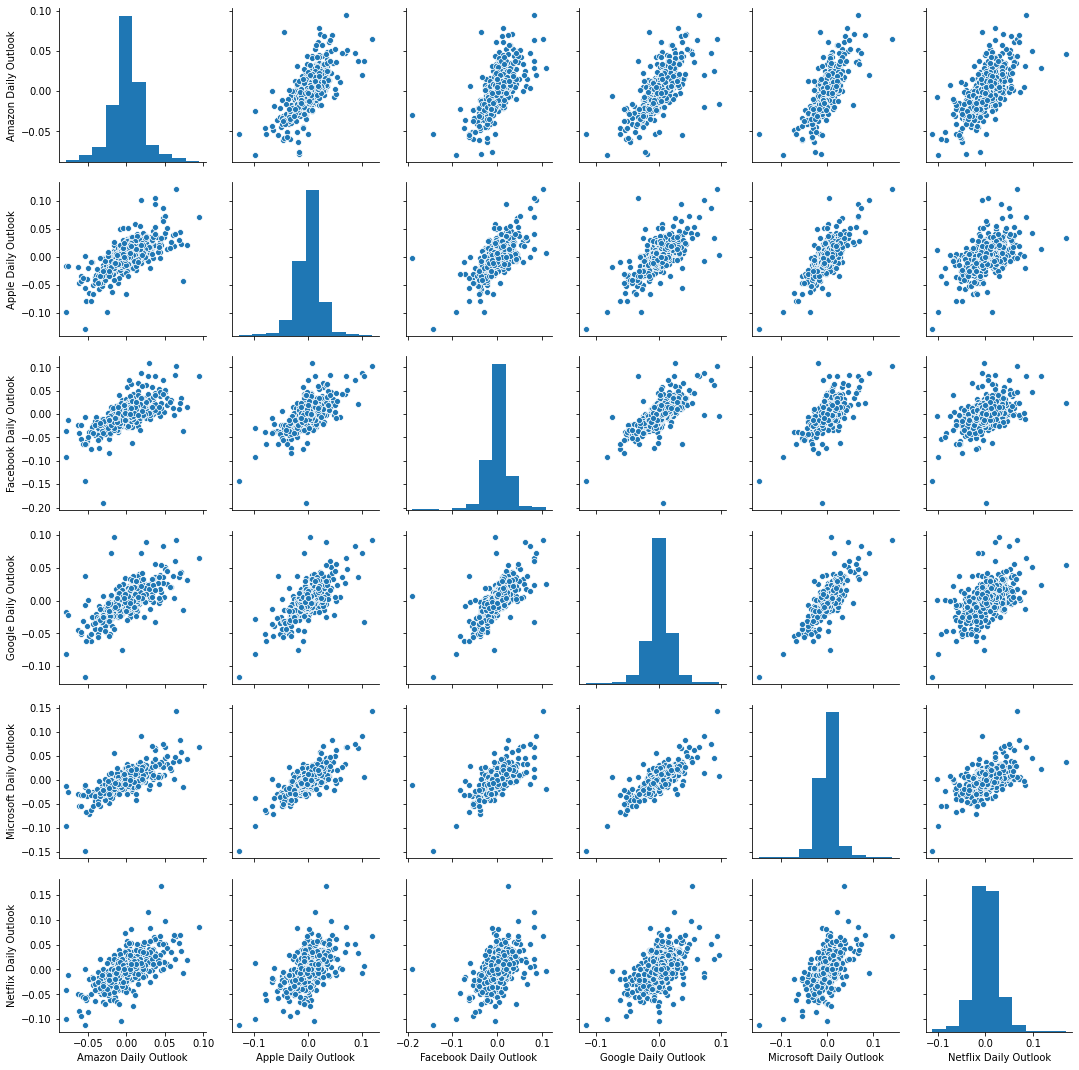

In [17]:
sns.pairplot(daily_outlook[1:]) #important to start from the second row to avoid the NaNs

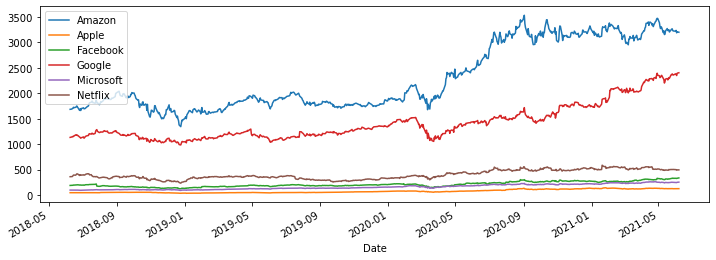

In [18]:
for tick in tickers:
    share_prices[tick]['Close'].plot(figsize=(12,4),label=tick)
plt.legend()

In [19]:
# plotly
share_prices.xs(key='Close',axis=1,level='Stock Info').iplot()


<AxesSubplot:xlabel='Ticker', ylabel='Ticker'>

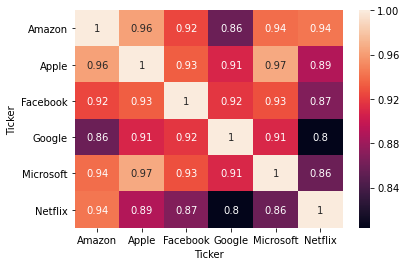

In [20]:
sns.heatmap(share_prices.xs(key='Close',axis=1,level='Stock Info').corr(),annot=True)

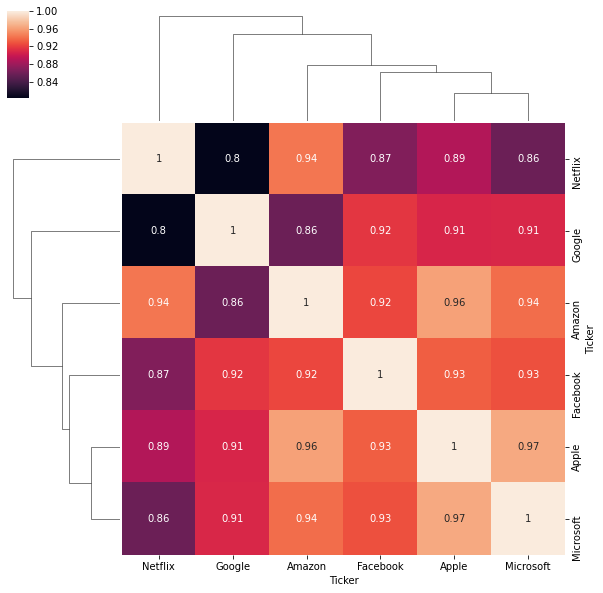

In [21]:
sns.clustermap(share_prices.xs(key='Close',axis=1,level='Stock Info').corr(),annot=True)

In [22]:
daily_outlook.reset_index(inplace= True)

In [23]:
daily_outlook

,Date,Amazon Daily Outlook,Apple Daily Outlook,Facebook Daily Outlook,Google Daily Outlook,Microsoft Daily Outlook,Netflix Daily Outlook
0,2018-06-08,NaN,NaN,NaN,NaN,NaN,NaN
1,2018-06-11,0.003046,-0.002452,0.012903,0.007231,-0.005707,0.002441
2,2018-06-12,0.005701,0.005491,0.004490,0.006390,0.002573,0.006585
3,2018-06-13,0.003597,-0.008217,0.000052,-0.003449,-0.004540,0.044251
4,2018-06-14,0.011145,0.000525,0.022868,0.013878,0.005652,0.034059
...,...,...,...,...,...,...,...
749,2021-06-01,-0.001371,-0.002648,0.001217,0.010323,-0.009132,-0.007418
750,2021-06-02,0.004766,0.006276,0.000061,-0.004447,-0.000404,0.000321
751,2021-06-03,-0.014527,-0.012154,-0.009449,-0.009706,-0.006429,-0.019650
752,2021-06-04,0.006028,0.019022,0.013219,0.019590,0.020675,0.010849


# A Closer look at the COVID period

Amazon

In [24]:
fig = px.line(daily_outlook, x='Date', y=daily_outlook['Amazon Daily Outlook'], range_x=['2020-03-01','2021-03-01'])

fig.update_xaxes(rangeslider_visible=True)
fig.show()


Apple

In [25]:
fig = px.line(daily_outlook, x='Date', y=daily_outlook['Apple Daily Outlook'], range_x=['2020-03-01','2021-03-01'])

fig.update_xaxes(rangeslider_visible=True)
fig.show()

Facebook

In [26]:
fig = px.line(daily_outlook, x='Date', y=daily_outlook['Facebook Daily Outlook'], range_x=['2020-03-01','2021-03-01'])

fig.update_xaxes(rangeslider_visible=True)
fig.show()

Google

In [27]:
fig = px.line(daily_outlook, x='Date', y=daily_outlook['Google Daily Outlook'], range_x=['2020-03-01','2021-03-01'])

fig.update_xaxes(rangeslider_visible=True)
fig.show()

Microsoft

In [28]:
fig = px.line(daily_outlook, x='Date', y=daily_outlook['Microsoft Daily Outlook'], range_x=['2020-03-01','2021-03-01'])

fig.update_xaxes(rangeslider_visible=True)
fig.show()

Netflix

In [29]:
fig = px.line(daily_outlook, x='Date', y=daily_outlook['Netflix Daily Outlook'], range_x=['2020-03-01','2021-03-01'])

fig.update_xaxes(rangeslider_visible=True)
fig.show()

# Conclusion

The essence of this article is not to predict the long term effects of the virus on the tech sector, as the challenges are eevolving with every new strain, but to see how well or otherwise the sector had reacted to the pandemic.   

The spread of the virus is likely to continue disrupting economic activities; hence, the financial markets will remain volatile and there will be some long term financial and economic consequences on the global economy. The massive roll-out of vaccines gives hope that the global economy would soon return to optimal level, but there is still a long way to go.

For now, the Big Tech seems to be reacting positively well to the situation. Standing at the precipice of the Information revolution, the technology industry has found ingenious ways to weather the effects and come out even stronger. It is hoped that that would spark further creativity and innovation in other fields of human endeavour. 